In [5]:
import pandas as pd
import json

json_data = json.load(open('../delphi_memory.json', 'r'))
json_data.keys()

responses = json_data['responses']
expert_stats = json_data['expert_stats']


df_responses = pd.DataFrame()
for question in responses:
    df_question = pd.DataFrame(responses[question])
    df_question['question'] = question

    df_question['timestamp'] = pd.to_datetime(df_question['timestamp'])
    df_question = df_question[['question', 'score', 'confidence', 'rationale', 'round_number', 'timestamp']]
    df_responses = pd.concat([df_responses, df_question], ignore_index=True)
df_responses

df_experts = pd.DataFrame()
for question in expert_stats:
    
    df_question = pd.DataFrame(expert_stats[question])
    df_question['question'] = question
    
    df_question = df_question[['question', 'median', 'q1', 'q3', 'mean', 'std']]
    
    df_experts = pd.concat([df_experts, df_question], ignore_index=True)
    

df_experts = df_experts.drop_duplicates()
# df_experts
# df_responses

In [11]:
import matplotlib.pyplot as plt

def plot_score_evolution(question, df_responses, df_experts):
    df_1 = df_responses[df_responses['question'] == question]
    df_2 = df_experts[df_experts['question'] == question]

    # Criar scatter plots separados para cada round para ter legenda adequada
    rounds = df_1['round_number'].unique()
    colors = ['green', 'blue', 'orange', 'purple', 'brown', 'pink']

    for i, round_num in enumerate(sorted(rounds)):
        round_data = df_1[df_1['round_number'] == round_num].sort_values(by='timestamp', ascending=False).head(1)
        plt.scatter(
            round_data['confidence'], 
            round_data['score'], 
            label=f'Round {round_num}', 
            color=colors[i],
            alpha=0.7)
        
        # add notation for round number near the point
        for _, row in round_data.iterrows():
            plt.text(row['confidence']*1.001, row['score']*1.001, f'R{round_num}', fontsize=9, color=colors[i])

    plt.axhline(y=df_2['median'].values[0], color='r', linestyle='--', label='Median Expert Score')
    # plt.fill_betweenx([0, 100], df_2['q1'].values[0], df_2['q3'].values[0], color='r', alpha=0.2, label='Expert Q1-Q3 Range')
    plt.ylabel('Score')
    plt.xlabel('Confidence')
    plt.xlim([0,5])
    plt.ylim([0,9])
    plt.title(f'Score vs Confidence for \n{question}')
    plt.legend()
    plt.show()


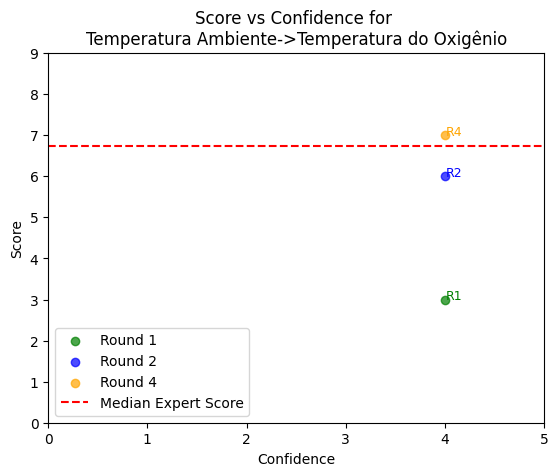

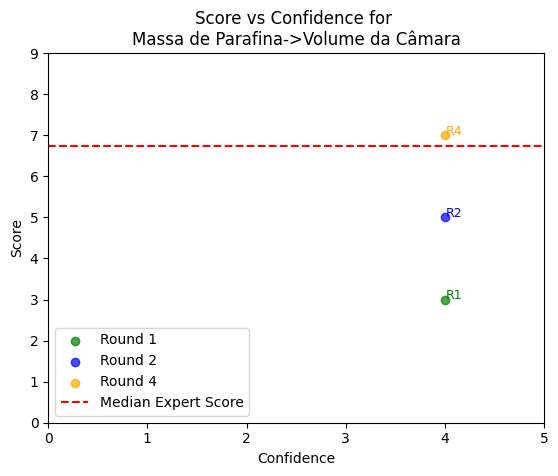

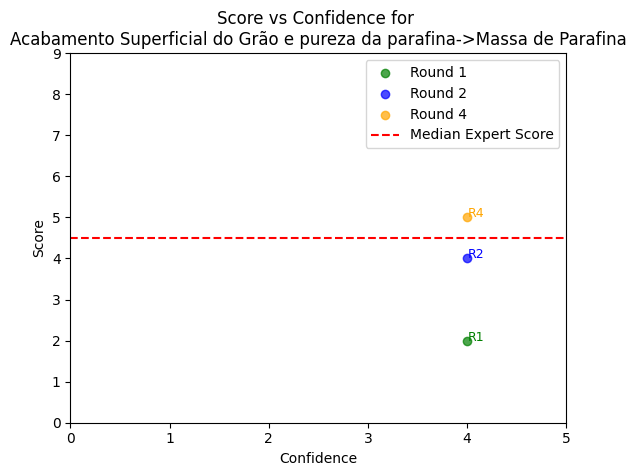

In [12]:
perguntas_com_maior_divergencia = df_responses.groupby('question').agg(
    media_respostas = ('score', 'mean'),
    desvio_padrao_respostas = ('score', 'std'),
    ).reset_index().sort_values(by='desvio_padrao_respostas', ascending=False)


for question in perguntas_com_maior_divergencia['question'].head(3):
    plot_score_evolution(question, df_responses, df_experts)